In [1]:
import pandas as pd
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Download the dataset (use only the dataset name, without file paths)
dataset_path = kagglehub.dataset_download("saad2134/basic-data-science-python-dataset")

# Construct the full file path
csv_file_path = os.path.join(dataset_path, "data.csv")

# Load dataset
df = pd.read_csv(csv_file_path)

In [3]:
# Display basic info and first few rows
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        8 non-null      int64
 1   Salary     8 non-null      int64
 2   Purchased  8 non-null      int64
dtypes: int64(3)
memory usage: 320.0 bytes
None


,Age,Salary,Purchased
0,25,50000,0
1,30,60000,1
2,35,75000,1
3,40,80000,0
4,45,85000,1


In [4]:
# Data Preprocessing
# Handling missing values
df.fillna(df.mean(), inplace=True)

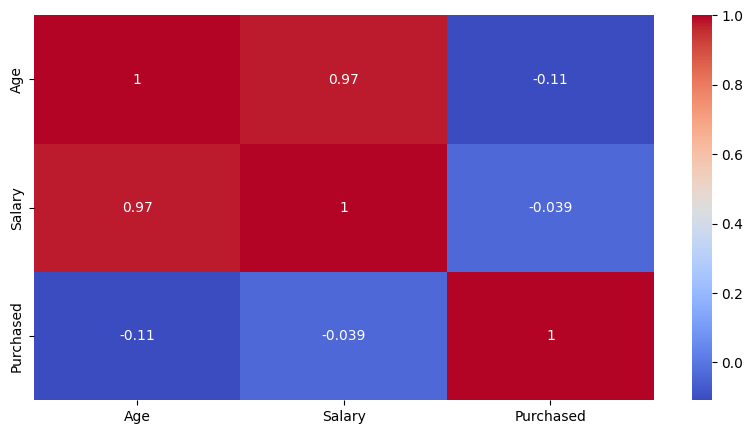

In [5]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
# Splitting data into train and test
X = df.drop("Purchased", axis=1)
y = df["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Predictions
y_pred = model.predict(X_test)

In [10]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.00
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

